In [ ]:
PassengerId - A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.
HomePlanet - The planet the passenger departed from, typically their planet of permanent residence.
CryoSleep - Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.
Cabin - The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.
Destination - The planet the passenger will be debarking to.
Age - The age of the passenger.
VIP - Whether the passenger has paid for special VIP service during the voyage.
RoomService, FoodCourt, ShoppingMall, Spa, VRDeck - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.
Name - The first and last names of the passenger.
Transported - Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict.

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("dataset/train.csv")

In [3]:
data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


## Data Preprocessing

In [4]:
data.shape

(8693, 14)

In [5]:
data.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [6]:
# Fill in missing values
def handle_nan(data, stats = True):
    
    # if true, use statistical inference obtained from the data to fill up nan.
    if stats:
        obj_cols = ["PassengerId","Cabin"]
        num_cols = ['Age', 'RoomService', 'FoodCourt','ShoppingMall', 'Spa', 'VRDeck']
        bool_cols = ["CryoSleep","Transported","VIP"]
        cat_cols = [col for col in data.columns if col not in obj_cols+num_cols+bool_cols]

        for col in data.columns:
            if col in cat_cols:
                data[col] = data[col].fillna(data[col].mode()[0])
                
            elif col in obj_cols:
                data[col] = data[col].fillna(data[col].mode()[0])
                
            elif col in num_cols:
                data[col] = data[col].fillna(0)
                
            else:
                data[col] = data[col].fillna(data[col].mode()[0])
                
                
     # if false, drop nan rows
    else:
        data = data.dropna()
            
    return data

In [7]:
data = handle_nan(data, stats = False)

In [8]:
data.isnull().sum()

PassengerId     0
HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Name            0
Transported     0
dtype: int64

## Data Analysis and Feature Transformation

In [9]:
data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [10]:
len(data["Cabin"].unique())

5305

In [11]:
### Breakdown the cabin
hold = data["Cabin"].unique()[0]

In [12]:
def handle_Cabin(data):
    deck_list = []
    num_list = []
    side_list = []
    
    
    cabin = data["Cabin"].to_list()
    for info in cabin:
        info = info.split('/')
        deck ,num, side = info[0], info[1], info[2]
        
        deck_list.append(deck)
        num_list.append(int(num))
        side_list.append(side)
        
    data["deck"],data["room_num"],data["room_side"] = deck_list, num_list, side_list
    
    return data

        

In [13]:
data =  handle_Cabin(data)

In [14]:
data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,deck,room_num,room_side
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,B,0,P
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,F,0,S
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,A,0,S
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,A,0,S
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,F,1,S


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6606 entries, 0 to 8692
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   6606 non-null   object 
 1   HomePlanet    6606 non-null   object 
 2   CryoSleep     6606 non-null   object 
 3   Cabin         6606 non-null   object 
 4   Destination   6606 non-null   object 
 5   Age           6606 non-null   float64
 6   VIP           6606 non-null   object 
 7   RoomService   6606 non-null   float64
 8   FoodCourt     6606 non-null   float64
 9   ShoppingMall  6606 non-null   float64
 10  Spa           6606 non-null   float64
 11  VRDeck        6606 non-null   float64
 12  Name          6606 non-null   object 
 13  Transported   6606 non-null   bool   
 14  deck          6606 non-null   object 
 15  room_num      6606 non-null   int64  
 16  room_side     6606 non-null   object 
dtypes: bool(1), float64(6), int64(1), object(9)
memory usage: 883.8+ KB


In [16]:
def correct_datatype(data):
    obj_cols = ["PassengerId","Cabin"]
    num_cols = ['Age', 'RoomService', 'FoodCourt','ShoppingMall', 'Spa', 'VRDeck','room_num']
    bool_cols = ["CryoSleep","Transported","VIP"]
    cat_cols = [col for col in data.columns if col not in obj_cols+num_cols+bool_cols]

    for col in data.columns:
        if col in bool_cols:
            data[col] = data[col].astype('bool')
        elif col in cat_cols:
            data[col] = data[col].astype('category')
        elif col in num_cols:
            data[col] = data[col].astype('float')

    return data

In [17]:
# correct datatype
data = correct_datatype(data)

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6606 entries, 0 to 8692
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   PassengerId   6606 non-null   object  
 1   HomePlanet    6606 non-null   category
 2   CryoSleep     6606 non-null   bool    
 3   Cabin         6606 non-null   object  
 4   Destination   6606 non-null   category
 5   Age           6606 non-null   float64 
 6   VIP           6606 non-null   bool    
 7   RoomService   6606 non-null   float64 
 8   FoodCourt     6606 non-null   float64 
 9   ShoppingMall  6606 non-null   float64 
 10  Spa           6606 non-null   float64 
 11  VRDeck        6606 non-null   float64 
 12  Name          6606 non-null   category
 13  Transported   6606 non-null   bool    
 14  deck          6606 non-null   category
 15  room_num      6606 non-null   float64 
 16  room_side     6606 non-null   category
dtypes: bool(3), category(5), float64(7), object(2)
memor

In [19]:
# review destination column
data["Destination"].unique()

[TRAPPIST-1e, PSO J318.5-22, 55 Cancri e]
Categories (3, object): [TRAPPIST-1e, PSO J318.5-22, 55 Cancri e]

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

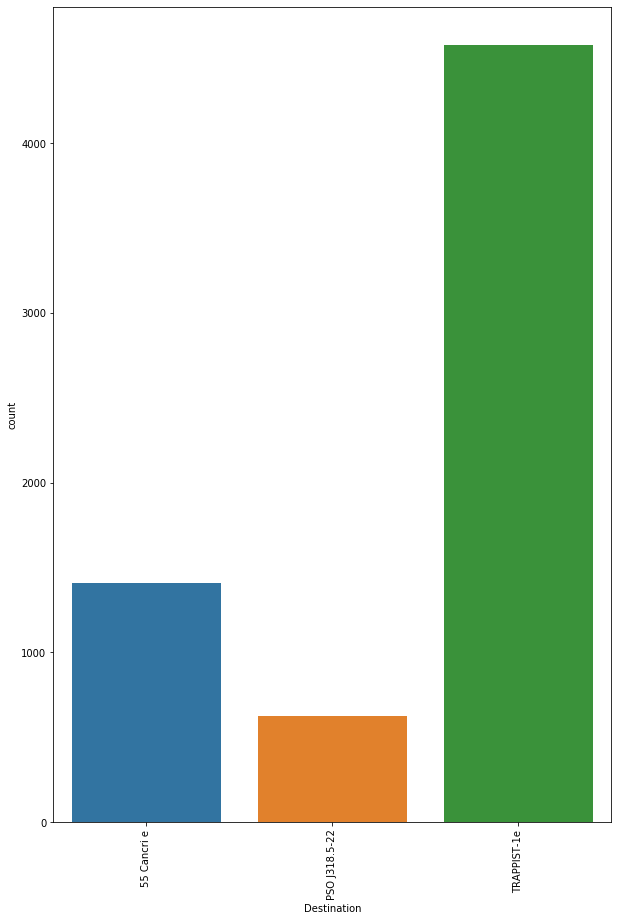

In [20]:
f, ax = plt.subplots(figsize=(10, 15))

g = sns.countplot(x="Destination", data=data)
plt.xticks(rotation=90)

In [21]:
# review homeplant column
data["HomePlanet"].unique()

[Europa, Earth, Mars]
Categories (3, object): [Europa, Earth, Mars]

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

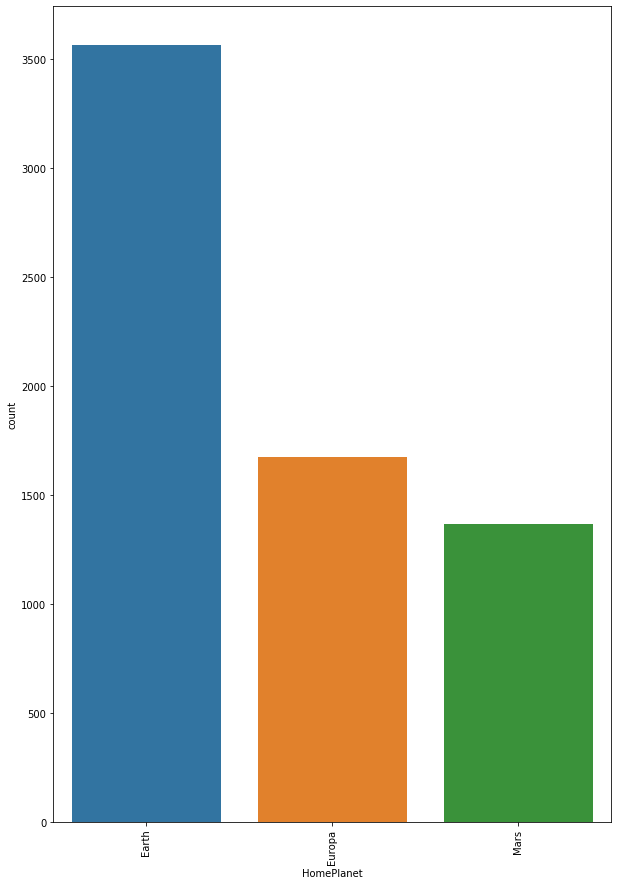

In [22]:
f, ax = plt.subplots(figsize=(10, 15))

g = sns.countplot(x="HomePlanet", data=data)
plt.xticks(rotation=90)

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

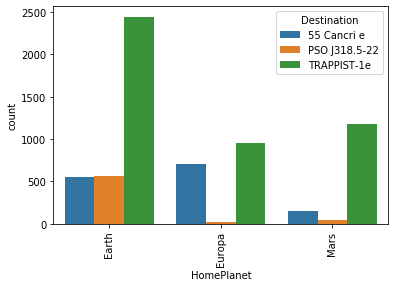

In [23]:
sns.countplot(data["HomePlanet"],hue=data["Destination"])
plt.xticks(rotation=90)

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

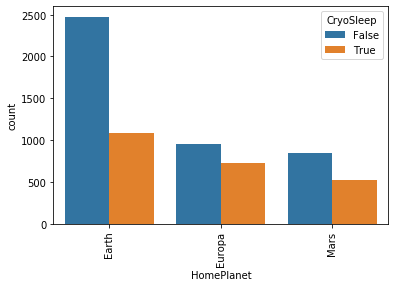

In [24]:
# checking the countplot relation of homeplanet and cyrosleep
sns.countplot(data["HomePlanet"],hue=data["CryoSleep"])
plt.xticks(rotation=90)

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

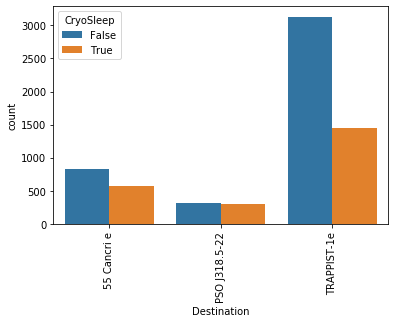

In [25]:
# checking the countplot relation of destination  and CryoSleep

sns.countplot(data["Destination"],hue=data["CryoSleep"])
plt.xticks(rotation=90)

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

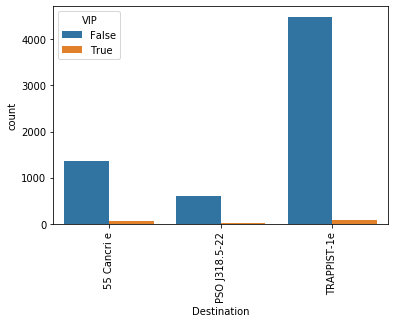

In [26]:
# checking the countplot relation of destination  and vip
sns.countplot(data["Destination"],hue=data["VIP"])
plt.xticks(rotation=90)

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

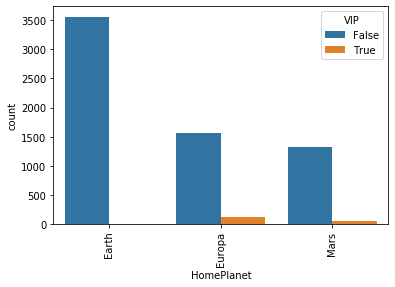

In [27]:
# checking the countplot relation of destination  and vip
sns.countplot(data["HomePlanet"],hue=data["VIP"])
plt.xticks(rotation=90)

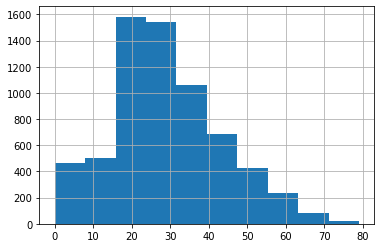

In [28]:
### Age distrubition
data["Age"].hist()

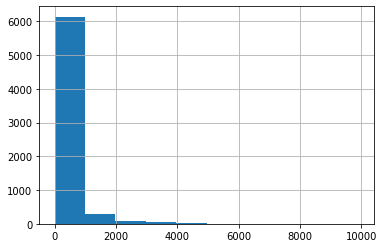

In [29]:
### Room Service distrubition
data["RoomService"].hist()

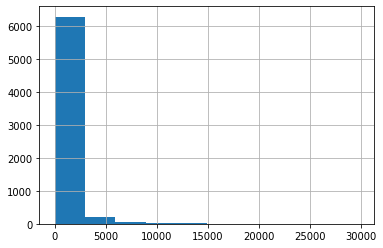

In [30]:
### FoodCourt distrubition
data["FoodCourt"].hist()

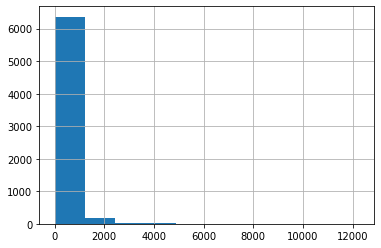

In [31]:
### ShoppingMall distrubition
data["ShoppingMall"].hist()

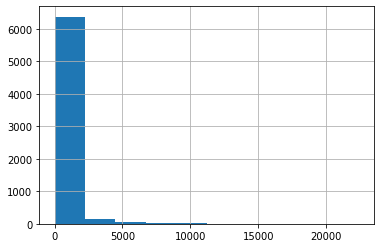

In [32]:
### Spa distrubition
data["Spa"].hist()

### Box plots diagram showing the distribution of luxury spenders based on homeplanet on the spaceship

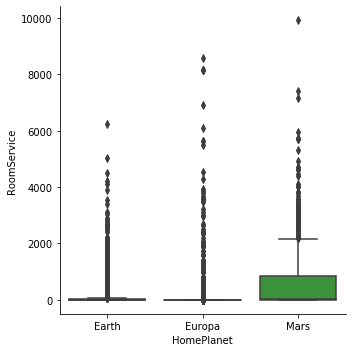

In [33]:
sns.catplot(x="HomePlanet", y="RoomService", kind="box", data=data)

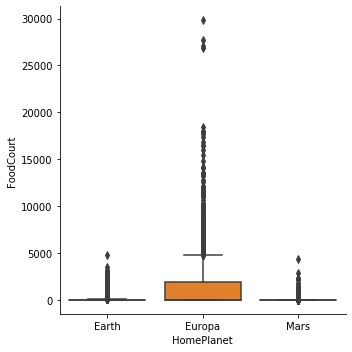

In [34]:
#sns.catplot(x='HomePlanet',y ='',data =data)
sns.catplot(x="HomePlanet", y="FoodCourt", kind="box", data=data)

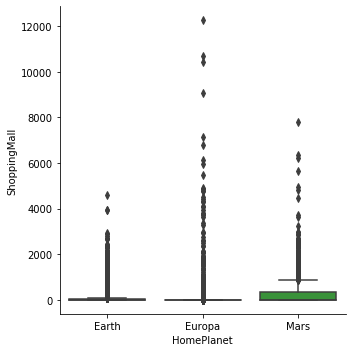

In [35]:
sns.catplot(x="HomePlanet", y="ShoppingMall", kind="box", data=data)

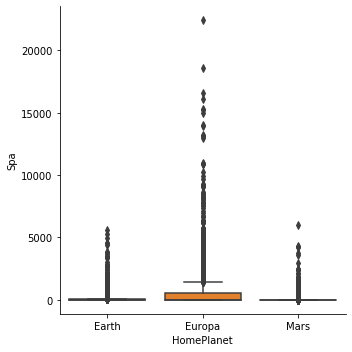

In [36]:
sns.catplot(x="HomePlanet", y="Spa", kind="box", data=data)

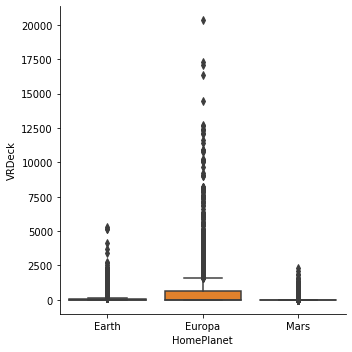

In [37]:
sns.catplot(x="HomePlanet", y="VRDeck", kind="box", data=data)

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

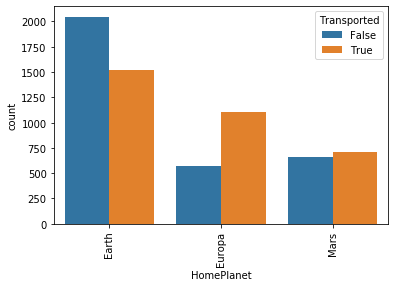

In [38]:
# how many members were successfully transported based on home planet
sns.countplot(data["HomePlanet"],hue=data["Transported"])
plt.xticks(rotation=90)

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

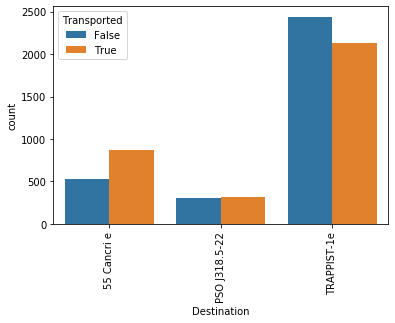

In [39]:
# how many members were successfully transported based on Destination
sns.countplot(data["Destination"],hue=data["Transported"])
plt.xticks(rotation=90)

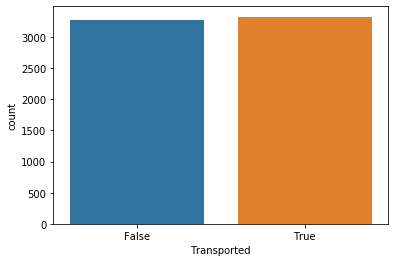

In [40]:
# check if target is balanced
sns.countplot(data["Transported"])

### Correlation between data points

In [41]:
obj_cols = ["PassengerId","Cabin"]
num_cols = ['Age', 'RoomService', 'FoodCourt','ShoppingMall', 'Spa', 'VRDeck','room_num']
bool_cols = ["CryoSleep","Transported","VIP"]
cat_cols = [col for col in data.columns if col not in obj_cols+num_cols+bool_cols]

In [42]:
cat_cols

['HomePlanet', 'Destination', 'Name', 'deck', 'room_side']

Text(0.5, 159.0, ' --- ')

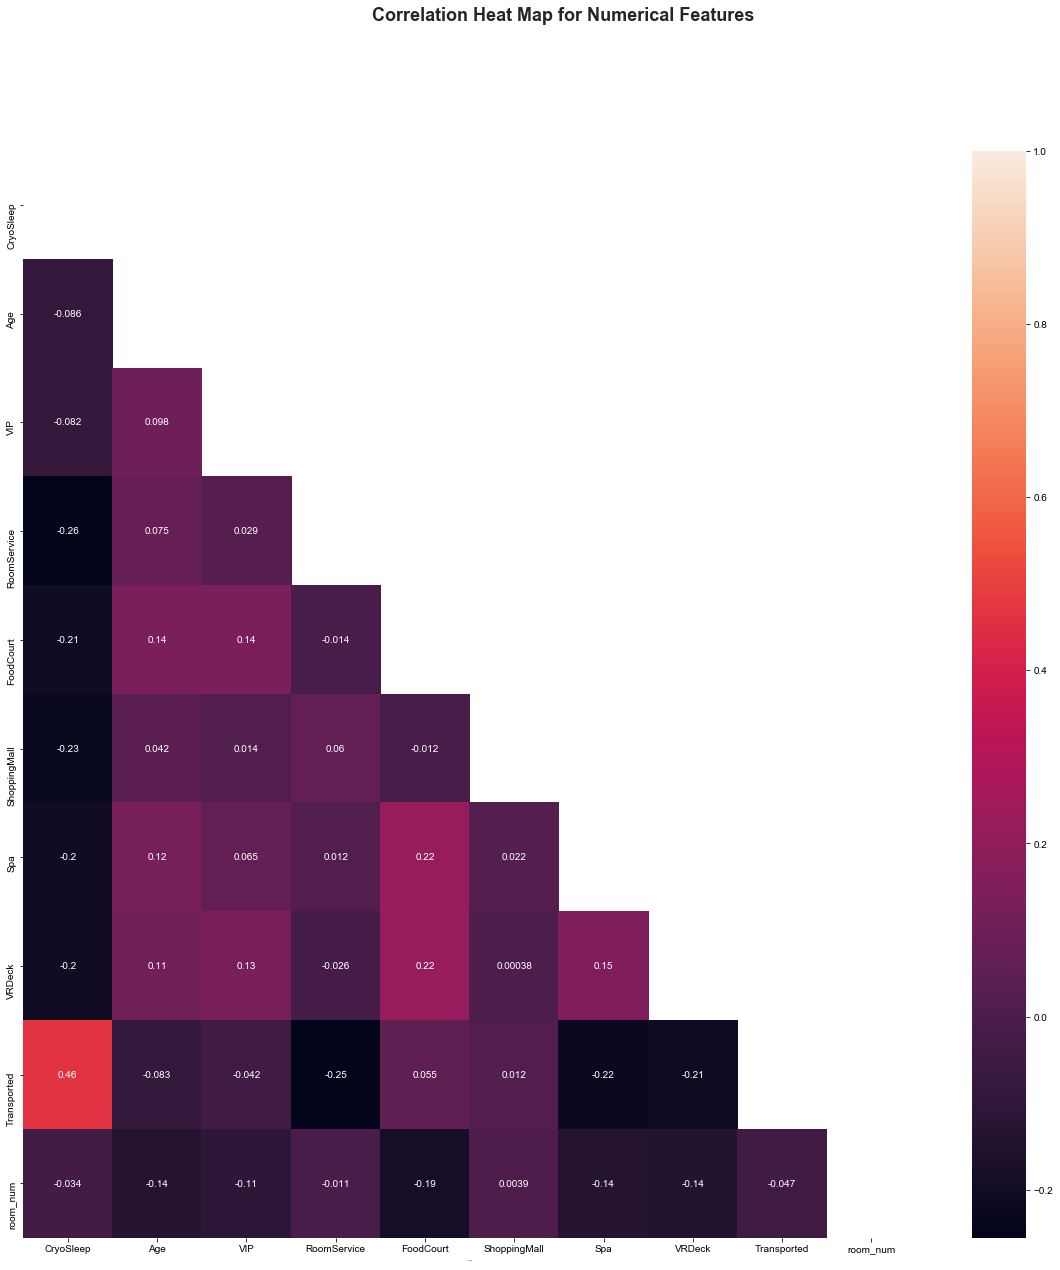

In [43]:
f, ax = plt.subplots(figsize=(20, 20))
data_corr = data.drop(cat_cols,axis=1)


mask = np.zeros_like(data_corr.corr())
mask[np.triu_indices_from(mask)] = True


sns.heatmap(data_corr.corr(), annot = True, mask=mask)

sns.set(font_scale = 1)
f.suptitle('Correlation Heat Map for Numerical Features', fontsize=18, fontweight='bold')
ax.set_xlabel(" --- ",size = 5,alpha=0.7)

In [44]:
data[cat_cols].head()

,HomePlanet,Destination,Name,deck,room_side
0,Europa,TRAPPIST-1e,Maham Ofracculy,B,P
1,Earth,TRAPPIST-1e,Juanna Vines,F,S
2,Europa,TRAPPIST-1e,Altark Susent,A,S
3,Europa,TRAPPIST-1e,Solam Susent,A,S
4,Earth,TRAPPIST-1e,Willy Santantines,F,S


In [45]:
from sklearn.preprocessing import OrdinalEncoder

In [46]:
enc = OrdinalEncoder()

In [47]:
cat_data = data[cat_cols].drop(["Name"],axis=1)

In [48]:
cat_data.head()

,HomePlanet,Destination,deck,room_side
0,Europa,TRAPPIST-1e,B,P
1,Earth,TRAPPIST-1e,F,S
2,Europa,TRAPPIST-1e,A,S
3,Europa,TRAPPIST-1e,A,S
4,Earth,TRAPPIST-1e,F,S


In [49]:
cat_data = enc.fit_transform(cat_data)

In [50]:
cat_data = pd.DataFrame(cat_data, columns=[i for i in cat_cols if i != "Name"])

In [51]:
cat_data.head()

,HomePlanet,Destination,deck,room_side
0,1.0,2.0,1.0,0.0
1,0.0,2.0,5.0,1.0
2,1.0,2.0,0.0,1.0
3,1.0,2.0,0.0,1.0
4,0.0,2.0,5.0,1.0


Text(0.5, 156.5, ' --- ')

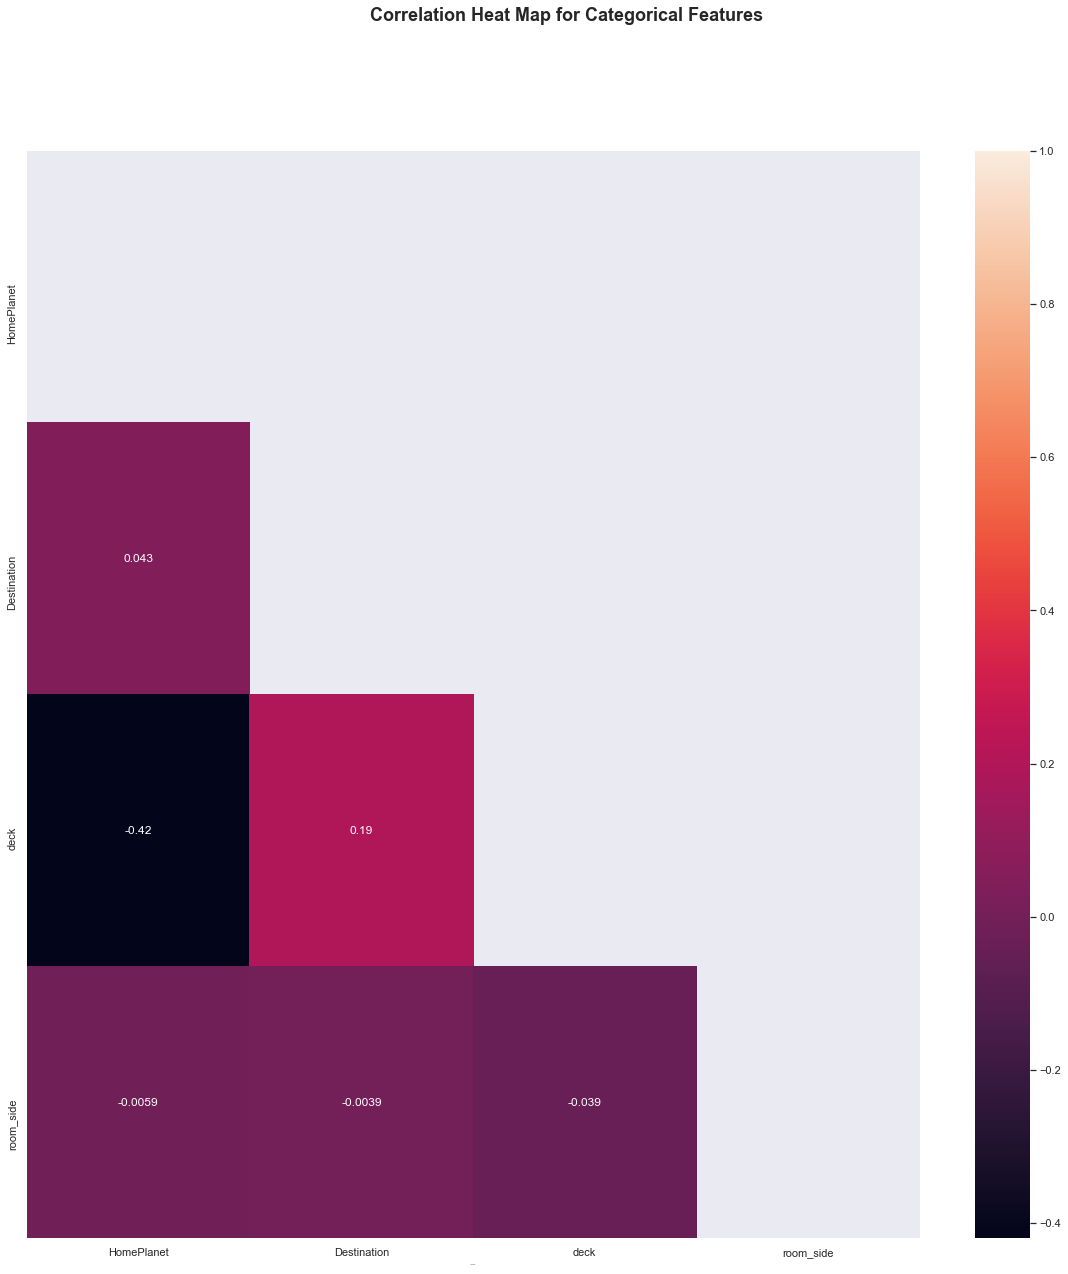

In [52]:
f, ax = plt.subplots(figsize=(20, 20))
data_corr = cat_data


mask = np.zeros_like(data_corr.corr())
mask[np.triu_indices_from(mask)] = True


sns.heatmap(data_corr.corr(), annot = True, mask=mask)

sns.set(font_scale = 1)
f.suptitle('Correlation Heat Map for Categorical Features', fontsize=18, fontweight='bold')
ax.set_xlabel(" --- ",size = 5,alpha=0.7)

### confirm correlation accross entire dataset

In [53]:
data["HomePlanet_enc"] = cat_data["HomePlanet"].to_list()
data["Destination_enc"] = cat_data["Destination"].to_list()
data["deck_enc"] = cat_data["deck"].to_list()
data["room_side_enc"] = cat_data["room_side"].to_list()

In [54]:
data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,...,VRDeck,Name,Transported,deck,room_num,room_side,HomePlanet_enc,Destination_enc,deck_enc,room_side_enc
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,...,0.0,Maham Ofracculy,False,B,0.0,P,1.0,2.0,1.0,0.0
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,...,44.0,Juanna Vines,True,F,0.0,S,0.0,2.0,5.0,1.0
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,...,49.0,Altark Susent,False,A,0.0,S,1.0,2.0,0.0,1.0
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,...,193.0,Solam Susent,False,A,0.0,S,1.0,2.0,0.0,1.0
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,...,2.0,Willy Santantines,True,F,1.0,S,0.0,2.0,5.0,1.0


Text(0.5, 156.453125, ' --- ')

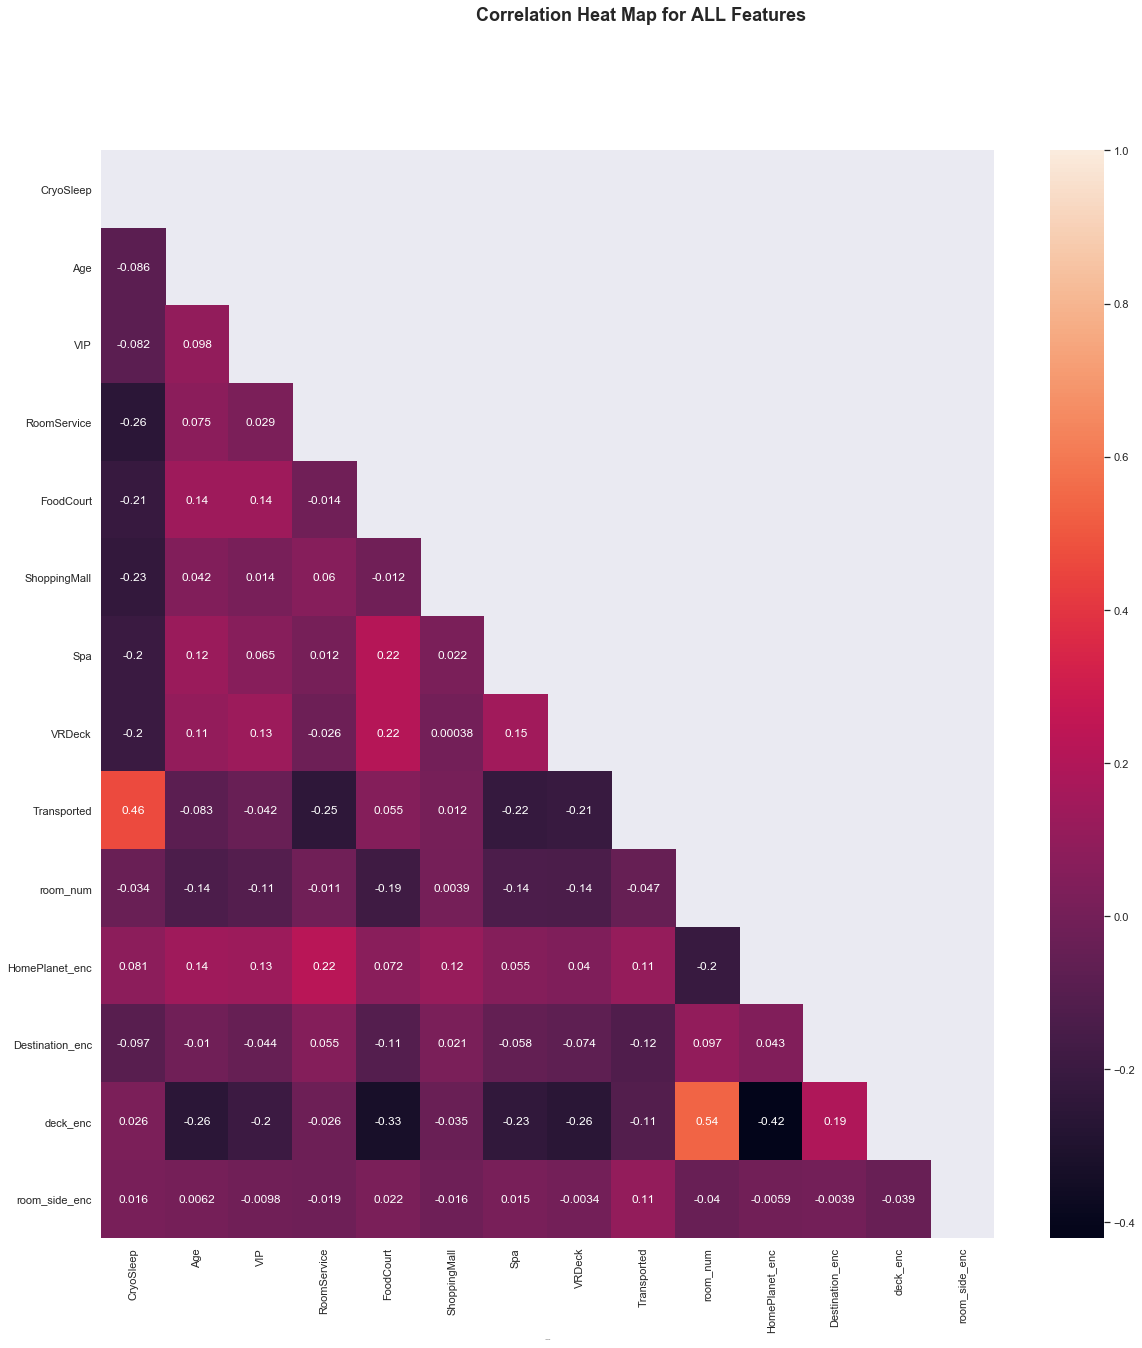

In [55]:
f, ax = plt.subplots(figsize=(20, 20))
data_corr = data.drop(cat_cols,axis=1)


mask = np.zeros_like(data_corr.corr())
mask[np.triu_indices_from(mask)] = True


sns.heatmap(data_corr.corr(), annot = True, mask=mask)

sns.set(font_scale = 1)
f.suptitle('Correlation Heat Map for ALL Features', fontsize=18, fontweight='bold')
ax.set_xlabel(" --- ",size = 5,alpha=0.7)

### No correlation among the columns

## Model Training & Evaluation

In [56]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import FeatureUnion

In [57]:
dataset =  pd.read_csv("dataset/train.csv")

In [58]:
dataset = handle_nan(dataset, stats = False)

In [59]:
dataset =  handle_Cabin(dataset)

In [60]:
dataset = correct_datatype(dataset)

In [61]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6606 entries, 0 to 8692
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   PassengerId   6606 non-null   object  
 1   HomePlanet    6606 non-null   category
 2   CryoSleep     6606 non-null   bool    
 3   Cabin         6606 non-null   object  
 4   Destination   6606 non-null   category
 5   Age           6606 non-null   float64 
 6   VIP           6606 non-null   bool    
 7   RoomService   6606 non-null   float64 
 8   FoodCourt     6606 non-null   float64 
 9   ShoppingMall  6606 non-null   float64 
 10  Spa           6606 non-null   float64 
 11  VRDeck        6606 non-null   float64 
 12  Name          6606 non-null   category
 13  Transported   6606 non-null   bool    
 14  deck          6606 non-null   category
 15  room_num      6606 non-null   float64 
 16  room_side     6606 non-null   category
dtypes: bool(3), category(5), float64(7), object(2)
memor

In [62]:
dataset.isnull().sum()

PassengerId     0
HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Name            0
Transported     0
deck            0
room_num        0
room_side       0
dtype: int64

In [63]:
dataset.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,deck,room_num,room_side
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,B,0.0,P
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,F,0.0,S
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,A,0.0,S
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,A,0.0,S
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,F,1.0,S


In [ ]:
#dataset["VIP"] = dataset["VIP"].astype(int) 

In [64]:
x = dataset.drop(["PassengerId","Cabin","Name","Transported"], axis=1)
y = dataset["Transported"].astype(int) 

In [65]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=3,stratify=y)

In [66]:
x_train.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,deck,room_num,room_side
8625,Earth,False,PSO J318.5-22,30.0,False,0.0,816.0,0.0,0.0,0.0,G,1484.0,S
2153,Europa,False,55 Cancri e,27.0,False,0.0,12077.0,0.0,75.0,0.0,C,82.0,P
6556,Earth,False,TRAPPIST-1e,29.0,False,0.0,10.0,0.0,5.0,975.0,E,462.0,S
651,Mars,False,TRAPPIST-1e,30.0,False,269.0,96.0,252.0,0.0,0.0,F,144.0,P
6053,Earth,False,PSO J318.5-22,18.0,False,0.0,0.0,1720.0,1.0,0.0,G,1032.0,P


In [67]:
# obtain statistical information on the Age column
x_train["Age"].describe()

count    5284.000000
mean       28.832135
std        14.481604
min         0.000000
25%        19.000000
50%        27.000000
75%        38.000000
max        79.000000
Name: Age, dtype: float64

In [68]:
# obtain statistical information on the RoomService column
x_train["RoomService"].describe()

count    5284.000000
mean      220.909349
std       642.167087
min         0.000000
25%         0.000000
50%         0.000000
75%        43.250000
max      9920.000000
Name: RoomService, dtype: float64

In [69]:
# obtain statistical information on the FoodCourt column
x_train["FoodCourt"].describe()

count     5284.000000
mean       468.731453
std       1645.622287
min          0.000000
25%          0.000000
50%          0.000000
75%         81.250000
max      29813.000000
Name: FoodCourt, dtype: float64

In [70]:
# obtain statistical information on the ShoppingMall column
x_train["ShoppingMall"].describe()

count     5284.000000
mean       178.861469
std        583.502676
min          0.000000
25%          0.000000
50%          0.000000
75%         25.000000
max      12253.000000
Name: ShoppingMall, dtype: float64

In [71]:
# obtain statistical information on the Spa column
x_train["Spa"].describe()

count     5284.000000
mean       312.908592
std       1095.401181
min          0.000000
25%          0.000000
50%          0.000000
75%         68.500000
max      16139.000000
Name: Spa, dtype: float64

In [72]:
# obtain statistical information on the VRDeck column
x_train["VRDeck"].describe()

count     5284.000000
mean       298.398372
std       1103.994123
min          0.000000
25%          0.000000
50%          0.000000
75%         47.000000
max      20336.000000
Name: VRDeck, dtype: float64

In [73]:
# obtain statistical information on the room_num column
x_train["room_num"].describe()

count    5284.000000
mean      599.819833
std       514.188487
min         0.000000
25%       165.000000
50%       425.500000
75%       993.250000
max      1894.000000
Name: room_num, dtype: float64

##### from the graph distribution and statistical information, we can see that the numerical data is skewed, so we need to scale it.

In [78]:
to_scale = ["Age","room_num","VRDeck","Spa","ShoppingMall","FoodCourt","RoomService"]
to_enc = ['HomePlanet', 'Destination', 'deck', 'room_side']
to_int = ["VIP","CryoSleep"]

In [79]:
class BoolTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, columns):
        self.columns = columns

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        x = None
        if isinstance(X, pd.DataFrame):
            x = pd.DataFrame(columns=self.columns)
            for i in self.columns:
                x[i] = X[i].astype(int) 
            
        return x[self.columns]

In [80]:
bool_pipe = Pipeline([('bool', BoolTransformer(to_int))])


In [81]:
col_transformer_1 = ColumnTransformer(
    remainder='drop',
    transformers=[
        ('scaler', StandardScaler(), to_scale)
        
    ]
)
col_transformer_2 = ColumnTransformer(
    remainder='drop',
    transformers=[
        ('encoder', OrdinalEncoder(), to_enc)
        
    ]
)

In [82]:
col_transformer = FeatureUnion([('ct1', col_transformer_1), ('ct2', col_transformer_2),('bool_pipe', bool_pipe)])

In [83]:
transformed_cols = to_scale + to_enc + to_int

In [84]:
assert len(transformed_cols) == len(x_train.columns), f"This is missing {[i for i in x_train.columns if i not in transformed_cols]}"

In [85]:
pipe = Pipeline([("transfrom",col_transformer)])

In [86]:
x_train[transformed_cols] = pipe.fit_transform(x_train[transformed_cols])

C:\Users\Kenechi\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Kenechi\anaconda3\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [87]:
x_train.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,deck,room_num,room_side
8625,0.0,0.0,1.0,0.080652,0.0,-0.344039,0.211046,-0.306560,-0.285684,-0.270315,6.0,1.719727,1.0
2153,1.0,0.0,0.0,-0.126527,0.0,-0.344039,7.054697,-0.306560,-0.217209,-0.270315,2.0,-1.007158,0.0
6556,0.0,0.0,2.0,0.011593,0.0,-0.344039,-0.278785,-0.306560,-0.281119,0.612925,4.0,-0.268059,1.0
651,2.0,0.0,2.0,0.080652,0.0,0.074895,-0.226520,0.125356,-0.285684,-0.270315,5.0,-0.886568,0.0
6053,0.0,0.0,1.0,-0.748064,0.0,-0.344039,-0.284862,2.641435,-0.284771,-0.270315,6.0,0.840589,0.0


In [88]:
x_test[transformed_cols] = pipe.transform(x_test[transformed_cols])

C:\Users\Kenechi\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Kenechi\anaconda3\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [89]:
x_test.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,deck,room_num,room_side
2610,1.0,0.0,2.0,0.356891,0.0,-0.328465,3.154284,-0.280850,-0.282945,-0.270315,2.0,-0.966313,1.0
6689,1.0,0.0,0.0,0.978428,0.0,-0.344039,0.987117,-0.306560,2.826713,-0.243139,3.0,-0.744583,1.0
3737,0.0,0.0,2.0,-0.817123,0.0,-0.339366,-0.234421,1.282272,-0.285684,-0.269410,6.0,0.111215,0.0
5584,2.0,0.0,2.0,-0.679004,0.0,0.836451,-0.026577,-0.306560,-0.285684,-0.270315,3.0,-0.816548,1.0
4550,1.0,0.0,2.0,-0.540885,0.0,-0.325350,0.842477,-0.306560,0.975161,0.053992,1.0,-0.793208,1.0


### Base model

In [90]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report

In [91]:
GaussianNB?

In [92]:
basemodel= GaussianNB()
basemodel.fit(x_train, y_train)

GaussianNB()

In [93]:
y_pred = basemodel.predict(x_test)

In [94]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.50      0.63       656
           1       0.65      0.92      0.76       666

    accuracy                           0.71      1322
   macro avg       0.75      0.71      0.70      1322
weighted avg       0.75      0.71      0.70      1322



#### Base Model Accuracy: 71%

### Accuracy Improvements

In [95]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

### Model 1 - Support Vector Classifier

In [96]:
model_1 = SVC(kernel = 'rbf', random_state = 0)
model_1.fit(x_train,y_train)

SVC(random_state=0)

In [97]:
y_pred_1 = model_1.predict(x_test)

In [98]:
print(classification_report(y_test,y_pred_1))

              precision    recall  f1-score   support

           0       0.79      0.78      0.79       656
           1       0.79      0.79      0.79       666

    accuracy                           0.79      1322
   macro avg       0.79      0.79      0.79      1322
weighted avg       0.79      0.79      0.79      1322



##### Applying K-CrossFold Validation:  Model - 1

In [99]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=3)

In [100]:
acc_scores_1 = cross_val_score(estimator = model_1 , X = x_train, y = y_train, scoring='accuracy', cv = cv)

In [101]:
acc_scores_1

array([0.80718336, 0.79962193, 0.80340265, 0.81285444, 0.80492424,
       0.77651515, 0.81439394, 0.8030303 , 0.82386364, 0.82954545,
       0.80907372, 0.80340265, 0.82041588, 0.81096408, 0.79924242,
       0.82575758, 0.80492424, 0.81628788, 0.77651515, 0.79545455,
       0.79017013, 0.80718336, 0.81285444, 0.82986767, 0.80113636,
       0.82386364, 0.79545455, 0.78409091, 0.80113636, 0.80113636])

In [102]:
acc_scores_1.mean()

0.8061422352065075

In [103]:
acc_scores_1.std()

0.013590016190004823

In [104]:
acc_scores_1.max()

0.8298676748582231

In [105]:
SVC?

##### Applying Grid Search:  Model - 1

In [106]:
parameters_1 = {
        'C': [1, 10, 100],
        'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
        'degree':[2,3],
        'class_weight':[{0:1,1:1}]}
    

grid_search = GridSearchCV(estimator = model_1, 
                           param_grid = parameters_1,
                           scoring = 'accuracy',
                           n_jobs = -1,
                           cv = cv)


In [107]:
grid_search = grid_search.fit(x_train, y_train)

In [109]:
best_acc_1 = grid_search.best_score_
best_acc_1

0.8103703624143133

In [110]:
best_parameters_1 = grid_search.best_params_
best_parameters_1

{'C': 100, 'class_weight': {0: 1, 1: 1}, 'degree': 2, 'kernel': 'rbf'}

#### The best accuracy this model can ouptut on the dataset after applying grid search and k-crossfold validation is 81% with the parameters : {'C': 100, 'class_weight': {0: 1, 1: 1}, 'degree': 2, 'kernel': 'rbf'}.

### Model 2 - Logistic Regressor Classifier

In [111]:
model_2 = LogisticRegression(random_state = 0)
model_2.fit(x_train, y_train)

LogisticRegression(random_state=0)

In [112]:
y_pred_2 = model_2.predict(x_test)

In [113]:
print(classification_report(y_test,y_pred_2))

              precision    recall  f1-score   support

           0       0.77      0.77      0.77       656
           1       0.77      0.78      0.78       666

    accuracy                           0.77      1322
   macro avg       0.77      0.77      0.77      1322
weighted avg       0.77      0.77      0.77      1322



##### Applying K-CrossFold Validation:  Model - 2

In [114]:
acc_scores_2 = cross_val_score(estimator = model_2 , X = x_train, y = y_train, scoring='accuracy', cv = cv)

In [115]:
acc_scores_2

array([0.80907372, 0.79206049, 0.79017013, 0.79395085, 0.79166667,
       0.78030303, 0.80492424, 0.78030303, 0.80871212, 0.79166667,
       0.79206049, 0.8147448 , 0.80340265, 0.80151229, 0.79734848,
       0.80681818, 0.78977273, 0.80681818, 0.75      , 0.77651515,
       0.76748582, 0.80718336, 0.80151229, 0.81852552, 0.8030303 ,
       0.81818182, 0.77462121, 0.78787879, 0.79166667, 0.78030303])

In [116]:
acc_scores_2.max()

0.8185255198487713

In [117]:
acc_scores_2.mean()

0.7944070907563346

In [118]:
LogisticRegression?

##### Applying  Grid Search :  Model - 2

In [119]:
parameters_2 = {
        'C': [1, 10, 100],
        'penalty': ['l1', 'l2', 'elasticnet'],
        'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
        'l1_ratio':[0.3,0.5,0.7]}
    

grid_search_2 = GridSearchCV(estimator = model_2, 
                           param_grid = parameters_2,
                           scoring = 'accuracy',
                           n_jobs = -1,
                           cv = cv)


In [120]:
grid_search_2 = grid_search_2.fit(x_train, y_train)

C:\Users\Kenechi\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:925: UserWarning: One or more of the test scores are non-finite: [       nan        nan 0.79459648        nan 0.79459625 0.79440709
 0.79440709 0.79434396 0.79440709 0.79440709        nan        nan
        nan        nan 0.79440697        nan        nan 0.79459648
        nan 0.79459625 0.79440709 0.79440709 0.79434396 0.79440709
 0.79440709        nan        nan        nan        nan 0.79440697
        nan        nan 0.79459648        nan 0.79459625 0.79440709
 0.79440709 0.79434396 0.79440709 0.79440709        nan        nan
        nan        nan 0.79440685        nan        nan 0.79484853
        nan 0.79472239 0.79484853 0.79484853 0.79484853 0.7947854
 0.7947854         nan        nan        nan        nan 0.7947854
        nan        nan 0.79484853        nan 0.79472239 0.79484853
 0.79484853 0.79484853 0.7947854  0.7947854         nan        nan
        nan        nan 0.7947854         nan        n

In [121]:
best_acc_2 = grid_search_2.best_score_
best_acc_2

0.7948485325848275

In [122]:
best_parameters_2 = grid_search_2.best_params_
best_parameters_2

{'C': 10, 'l1_ratio': 0.3, 'penalty': 'l1', 'solver': 'liblinear'}

#### The best accuracy this model can ouptut on the dataset after applying grid search and k-crossfold validation is 79% with the parameters : {'C': 10, 'l1_ratio': 0.3, 'penalty': 'l1', 'solver': 'liblinear'}. 

### Model 3 - Random Forest Classifer

In [123]:
model_3 = RandomForestClassifier(n_estimators = 10, criterion= 'entropy' , random_state =0)
model_3.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [124]:
y_pred_3 = model_3.predict(x_test)

In [125]:
print(classification_report(y_test,y_pred_3))

              precision    recall  f1-score   support

           0       0.75      0.85      0.80       656
           1       0.83      0.72      0.77       666

    accuracy                           0.78      1322
   macro avg       0.79      0.78      0.78      1322
weighted avg       0.79      0.78      0.78      1322



##### Applying K-CrossFold Validation:  Model - 3

In [126]:
acc_scores_3 = cross_val_score(estimator = model_3 , X = x_train, y = y_train, scoring='accuracy', cv = cv)

In [127]:
acc_scores_3

array([0.80151229, 0.78827977, 0.78827977, 0.81096408, 0.77083333,
       0.78030303, 0.79356061, 0.78598485, 0.79734848, 0.79545455,
       0.7826087 , 0.80340265, 0.78638941, 0.79206049, 0.8125    ,
       0.79545455, 0.77840909, 0.80113636, 0.76136364, 0.76136364,
       0.76937618, 0.79584121, 0.80151229, 0.78827977, 0.79545455,
       0.79545455, 0.75568182, 0.76893939, 0.78787879, 0.78030303])

In [128]:
acc_scores_3.mean()

0.7875310286227112

In [129]:
acc_scores_3.max()

0.8125

In [ ]:
RandomForestClassifier?

##### Applying  Grid Search :  Model - 3

In [130]:
parameters_3 = {
        'n_estimators': [100,200, 500],
        'criterion': ["gini", "entropy"],
        'max_depth':[3, 6, 9],
        'max_features':["auto", "sqrt", "log2"],
        'min_samples_split':[2,3]
}
    

grid_search_3 = GridSearchCV(estimator = model_3, 
                           param_grid = parameters_3,
                           scoring = 'accuracy',
                           n_jobs = -1,
                           cv = cv)

In [131]:
grid_search_3 = grid_search_3.fit(x_train, y_train)

In [132]:
best_acc_3 = grid_search_3.best_score_
best_acc_3

0.8093612161310647

In [133]:
best_parameters_3 = grid_search_3.best_params_
best_parameters_3

{'criterion': 'entropy',
 'max_depth': 9,
 'max_features': 'auto',
 'min_samples_split': 3,
 'n_estimators': 500}

#### The best accuracy this model can ouptut on the dataset after applying grid search and k-crossfold validation is 80% with the parameters :{'criterion': 'entropy','max_depth': 9,'max_features': 'auto','min_samples_split': 3,'n_estimators': 500}

### With Tree - based algorithms more analysis can be perfomred on the model

In [134]:
Final_model = grid_search_3.best_estimator_

In [135]:
Final_model.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=9, min_samples_split=3,
                       n_estimators=500, random_state=0)

In [136]:
Final_model.score(x_test, y_test)

0.7927382753403933

In [ ]:
###### The answer corresponds with the expectation using the specified parameters

In [137]:
f_model = grid_search_3.best_estimator_

In [138]:
x[transformed_cols] = pipe.fit_transform(x[transformed_cols])

In [139]:
### Final Model
f_model.fit(x,y)

RandomForestClassifier(criterion='entropy', max_depth=9, min_samples_split=3,
                       n_estimators=500, random_state=0)

### view the feature importance

In [140]:
#function for ploting models feature importance bar chart

def plot_feature_importance(importance,names,model_type):
    
    #Create arrays from feature importance and feature names
    feature_importance = np.array(importance)
    feature_names = np.array(names)

    #Create a DataFrame using a Dictionary
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)

    #Sort the DataFrame in order decreasing feature importance
    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

    #Define size of bar plot
    plt.figure(figsize=(10,8))
    #Plot Searborn bar chart
    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
    #Add chart labels
    plt.title(model_type + ' FEATURE IMPORTANCE')
    plt.xlabel('FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES')

In [141]:
feature = x.columns

# features importance

feat_importance = pd.DataFrame(f_model.feature_importances_,index=feature)

features = feat_importance.sort_values(0)

features

,0
VIP,0.001807
room_side,0.020234
Destination,0.020429
HomePlanet,0.062368
Age,0.063007
ShoppingMall,0.069688
deck,0.074967
room_num,0.078010
FoodCourt,0.093283
RoomService,0.115510


In [142]:
model_name = 'Random Forest Classifier'

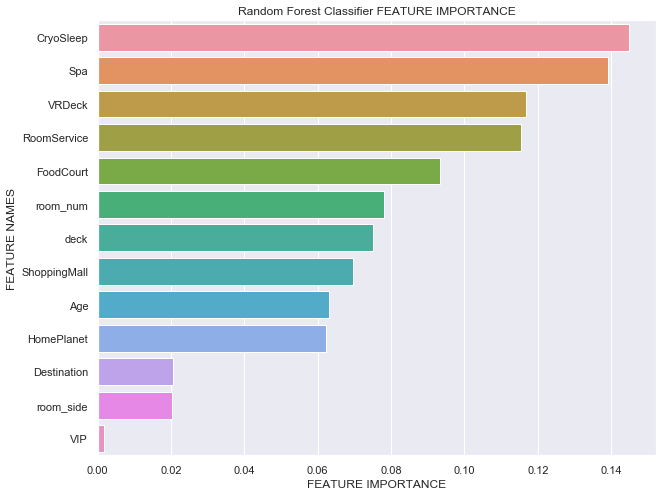

In [143]:
plot_feature_importance(f_model.feature_importances_,feature,model_name)

##### With this information, the whole process can be repeated for the random forest model, but this time excluding the columns "room_side", "Destination", and "VIP" since they provide little to no information to the model. 